# Config

In [11]:
import os
from tools.utils import *

In [12]:
# import conversion tools
from tools.conv_tools import *
from tools import conv_tools
ctools = get_funs_from_module(conv_tools)
ctools.keys()

dict_keys(['PyPDF4_ocr', 'add_metadata_entry', 'dbg', 'emb_text_is_usable', 'extract_text', 'get_child_dir_paths', 'get_child_ext_path', 'get_dir_and_doc_paths', 'get_emb_txt', 'get_funs_from_module', 'get_langs', 'get_meta_path', 'get_metadata', 'get_parent_dir', 'get_translation', 'get_txt', 'get_var_name', 'get_xml', 'getmembers', 'grobid_extr', 'img2pdf', 'in_lang_sc', 'in_lang_wl', 'isfunction', 'join_parentpath_childnames', 'list_ext', 'mess_col', 'metadata', 'mkdir_no_over', 'mv_to_custom_dir', 'pdf2img', 'pdfminer_ocr', 'pdfreader_ocr', 'prep_and_tokenise', 'pytesseract_ocr', 'read', 'read_doc_metadata', 'save_data', 'save_file', 'sent_tokenize', 'store_data', 'tika_ocr', 'translate_conv', 'translate_doc', 'translate_meta', 'translate_to_lang', 'translate_wl', 'translation', 'true_counter', 'try_read', 'verbose_mess', 'words_in_lang_ratio', 'words_in_langs_ratio', 'write_pdf_metadata'])

In [13]:
from tools import eval_tools
etools = get_funs_from_module(eval_tools)
etools.keys()

dict_keys(['add_metadata_entry', 'dbg', 'emb_text_is_usable', 'eval_tools_scores', 'get_child_dir_paths', 'get_child_ext_path', 'get_dir_and_doc_paths', 'get_emb_txt', 'get_funs_from_module', 'get_langs', 'get_meta_path', 'get_metadata', 'get_parent_dir', 'get_translation', 'get_var_name', 'getmembers', 'in_lang_sc', 'in_lang_wl', 'isfunction', 'join_parentpath_childnames', 'list_ext', 'mess_col', 'metadata', 'mkdir_no_over', 'mv_to_custom_dir', 'prep_and_tokenise', 'read_doc_metadata', 'save_data', 'save_file', 'sent_tokenize', 'spellcheck_score', 'store_data', 'translate_conv', 'translate_doc', 'translate_meta', 'translate_to_lang', 'translate_wl', 'translation', 'true_counter', 'try_read', 'verbose_mess', 'word_is_correct_Q', 'words_in_lang_ratio', 'words_in_langs_ratio', 'write_pdf_metadata'])

# Load and Rearrange Files

In [14]:
from tools.utils import *

In [15]:
data_path = os.path.join('data')

input_dir_path = os.path.join(data_path, 'docs_for_eval')

selected_conv_tools = ['PyPDF4_ocr',    # names of the tools for conversion
                    'extract_text',
                    'pdfminer_ocr',
                    'pdfreader_ocr',
                    'pytesseract_ocr',
                    'tika_ocr',  
                    ]
selected_scores = ['spellcheck_score',  # names of the scores for tool evaluation
                    ]
score_data_dirpath = 'evaluation_results'
score_data_filepath = os.path.join(score_data_dirpath,'scores')

doc_paths = [os.path.join(input_dir_path, filepath) for filepath in os.listdir(input_dir_path) if os.path.isfile(os.path.join(input_dir_path, filepath))]


In [16]:
%%capture
# if there are any imgs, convert them to pdf
not_pdf_filepaths = list_ext(input_dir_path,    # files to be converted to pdf
                            exts=['pdf'],
                            invert=True)

for not_pdf_filepath in not_pdf_filepaths:
    ctools['img2pdf']([not_pdf_filepath])

pdf_filepaths = list_ext(input_dir_path,        # all pdf files
                        exts=['pdf'],
                        invert=False)

In [17]:
# rearrange folder structure
for pdf_filepath in pdf_filepaths:
    mv_to_custom_dir(pdf_filepath)
for not_pdf_filepath in not_pdf_filepaths:
    os.remove(not_pdf_filepath)

In [18]:
dir_paths = get_child_dir_paths(input_dir_path)

# compile metadata for each file
for dir_path in tqdm(dir_paths, desc='dir_paths'):
    metadata = get_metadata(dir_path,
                            storage_opts={'lang_codes':True, 'emb_txt':True},
                            overwrite_opts={'lang_codes':False, 'emb_txt':False},
                            )

    store_data(storage='meta',
                data=metadata,
                dir_path=dir_path,
                name='metadata',
                )

dir_paths: 100%|██████████| 25/25 [00:01<00:00, 14.65it/s]


# Conversion

In [19]:
from tools.conv_tools import *
import sys

In [20]:
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

for dir_path in tqdm(dir_paths, desc='dir_paths: '):
    dbg(dir_path)
    ocr_txt = get_txt(dir_path,
                    tool_names=selected_conv_tools,
                    tools=ctools,
                    storage_opts={'ocr_txt':True, 'ocr_txt_trans':False},
                    overwrite_opts={'ocr_txt':False, 'ocr_txt_trans':False},
                    )

    store_data(storage='dir',
                data=ocr_txt,
                dir_path=dir_path,
                name='ocr_extraction')

dir_paths:   0%|          | 0/25 [00:00<?, ?it/s]

dir_path: data/docs_for_eval/2007_Cocquempot_Faune_Psylles_Psylloidea_France


dir_paths:   4%|▍         | 1/25 [00:44<17:56, 44.84s/it]

dir_path: data/docs_for_eval/2011_lethmayer_Cacopsylla_pruni_Austria_vol64-2011-S255-S256


dir_paths:   8%|▊         | 2/25 [00:46<07:23, 19.28s/it]

dir_path: data/docs_for_eval/1871_Puton_Psyllides_France_Cacopsylla_pruni


dir_paths:  12%|█▏        | 3/25 [00:47<04:04, 11.09s/it]

dir_path: data/docs_for_eval/2013_Kanturski_&_Drohojowska_Poland_Cacopsylla


dir_paths:  16%|█▌        | 4/25 [00:52<02:59,  8.55s/it]

dir_path: data/docs_for_eval/2003_Baugnée_Hemiptères_Gembloux


dir_path: data/docs_for_eval/2010_Inoue_checklist_psyllids_Japan


dir_paths:  24%|██▍       | 6/25 [00:59<01:53,  5.97s/it]

dir_path: data/docs_for_eval/1900_Lameere_psyllids_Belgium


dir_path: data/docs_for_eval/1910_Haupt_Cacopsylla_pruni_Thuringen_Allemagn


dir_paths:  32%|███▏      | 8/25 [01:02<01:10,  4.13s/it]

dir_path: data/docs_for_eval/2017_Cho_Taxonomy_of_Korean_Psylloidea


dir_paths:  36%|███▌      | 9/25 [01:30<02:34,  9.68s/it]

dir_path: data/docs_for_eval/1918_Jacobsen_Cacopsylla_pruni_Danemark


dir_path: data/docs_for_eval/1970_Ossiannilsson_Hepatopsylla


dir_path: data/docs_for_eval/2015_Albrecht_Check_list_of_Finnish_Hemiptera


dir_paths:  44%|████▍     | 11/25 [01:31<01:55,  8.28s/it]


PdfReadError: File has not been decrypted

# Evaluation

In [ ]:
from tools.eval_tools import eval_tools_scores

In [ ]:
scores_results = eval_tools_scores(db_dir_path=input_dir_path,
                        conv_tool_names=selected_conv_tools, # tools to be evaluated
                        score_names=selected_scores,
                        scoring_funs=etools,
                        )
scores_results

  0%|          | 0/27 [00:00<?, ?it/s]Exception ignored in: <function Dict.__del__ at 0x7f2c7a8a8e50>
Traceback (most recent call last):
  File "/home/elubrini/GitHub/psylloidea_ontology/venv/lib/python3.10/site-packages/enchant/__init__.py", line 556, in __del__
    self._free()
  File "/home/elubrini/GitHub/psylloidea_ontology/venv/lib/python3.10/site-packages/enchant/__init__.py", line 614, in _free
    self._broker._free_dict(self)
  File "/home/elubrini/GitHub/psylloidea_ontology/venv/lib/python3.10/site-packages/enchant/__init__.py", line 322, in _free_dict
    self._free_dict_data(dict._this)
  File "/home/elubrini/GitHub/psylloidea_ontology/venv/lib/python3.10/site-packages/enchant/__init__.py", line 329, in _free_dict_data
    _e.broker_free_dict(self._this, dict)
KeyboardInterrupt: 
  0%|          | 0/27 [00:52<?, ?it/s]

e.g. sudo apt install aspell-en


UnboundLocalError: local variable 'c' referenced before assignment

In [ ]:
try:
    os.mkdir(score_data_dirpath)
except FileExistsError:
    print('{0} directory already exists.'.format(score_data_dirpath))
with open(score_data_filepath+'.json', 'w+') as f:
    json.dump(scores_results, f)

evaluation_results directory already exists.


# Visualisation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
with open(score_data_filepath+'.json', 'r') as f:
    score_results = json.load(f)

In [ ]:
score_name = selected_scores[0]
data = score_results[score_name]

Text(0, 0.5, 'spellcheck_score')

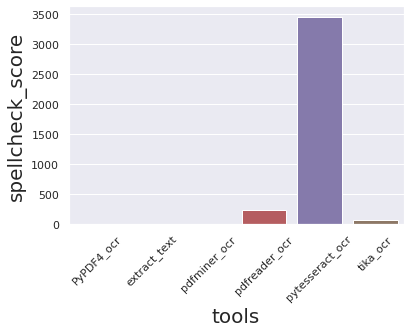

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation=45)
p = sns.barplot(x=list(data.keys()), y=list(data.values()))
p.set_xlabel('tools', fontsize = 20)
p.set_ylabel(score_name, fontsize = 20)

In [ ]:
p.figure.savefig(score_data_filepath+'.png')